In [ ]:
# Topic modelling BTM elbow method

Get optimal number of topics based on BTM logLik value output.

[Knee library (elbow method )]

In [54]:
import matplotlib.pyplot as plt
from kneed import KneeLocator # elbow method
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d # normalise curve

In [55]:
df = pd.read_csv('../datain/topic_modelling/BTMrunning.csv')
df

,Log,Topics,LogLik
0,8.238415,4,-173147202
1,8.231924,5,-170578552
2,8.228839,6,-169370878
3,8.226223,7,-168354008
4,8.224064,8,-167519089
5,8.224624,9,-167735262
6,8.221341,10,-166471854
7,8.220166,11,-166022211
8,8.218789,12,-165496610
9,8.218194,13,-165269809


In [56]:
topics = df[['Topics']].to_numpy()
topics

array([[ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48]])

In [57]:
loglikvals = df[['LogLik']].to_numpy()
loglikvals

array([[-173147202],
       [-170578552],
       [-169370878],
       [-168354008],
       [-167519089],
       [-167735262],
       [-166471854],
       [-166022211],
       [-165496610],
       [-165269809],
       [-164697669],
       [-164346746],
       [-164214998],
       [-164113393],
       [-163734366],
       [-163534564],
       [-163485742],
       [-163529923],
       [-163036367],
       [-163381837],
       [-162660606],
       [-162612370],
       [-162772607],
       [-162204660],
       [-162405769],
       [-162336646],
       [-162053387],
       [-161924229],
       [-161992518],
       [-161762292],
       [-161802569],
       [-161567580],
       [-161404961],
       [-161533272],
       [-161367473],
       [-161300059],
       [-161241164],
       [-161413198],
       [-161025984],
       [-161134165],
       [-161086509],
       [-160921866],
       [-160858573],
       [-161027380],
       [-161049514]])

In [58]:
x = np.concatenate(topics).ravel()
x

array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])

In [59]:
y = np.concatenate(loglikvals).ravel()
y

array([-173147202, -170578552, -169370878, -168354008, -167519089,
       -167735262, -166471854, -166022211, -165496610, -165269809,
       -164697669, -164346746, -164214998, -164113393, -163734366,
       -163534564, -163485742, -163529923, -163036367, -163381837,
       -162660606, -162612370, -162772607, -162204660, -162405769,
       -162336646, -162053387, -161924229, -161992518, -161762292,
       -161802569, -161567580, -161404961, -161533272, -161367473,
       -161300059, -161241164, -161413198, -161025984, -161134165,
       -161086509, -160921866, -160858573, -161027380, -161049514])

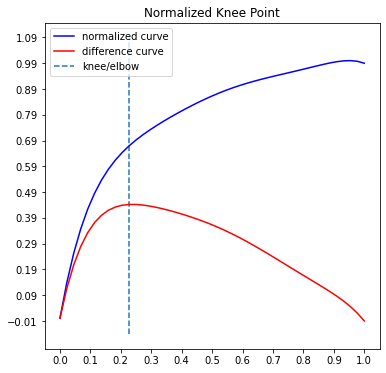

In [136]:
kl = KneeLocator(x, y, curve="concave", direction="increasing", interp_method="polynomial", polynomial_degree=6)
kl.plot_knee_normalized()

In [137]:
kl.elbow

14

In [138]:
kl.polynomial_degree

6